In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Plotting a scatter plot

In [2]:
# Data for the first part of the experiment
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y = [5, 6, 7, 8, 7, 9, 10, 10, 11, 12]

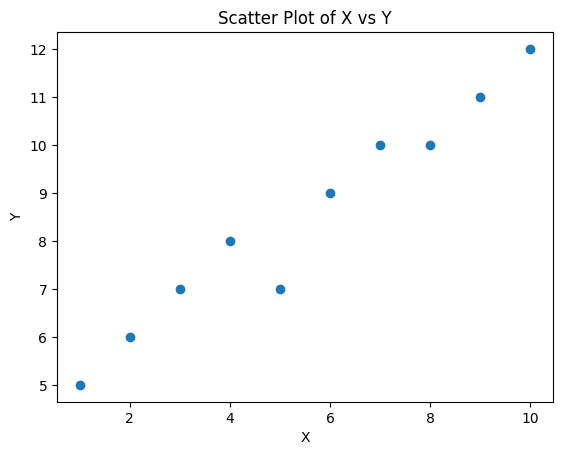

In [3]:
# Plotting the scatter plot
plt.scatter(X, Y)
plt.title("Scatter Plot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Function to calculate Pearson's correlation coefficient

In [4]:
# Function to calculate Pearson's correlation coefficient
def pearson_correlation(x, y):
    n = len(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denominator = np.sqrt(sum((xi - mean_x) ** 2 for xi in x) * sum((yi - mean_y) ** 2 for yi in y))
    return numerator / denominator

Function to calculate Spearman's rank correlation coefficient

In [5]:
# Function to calculate Spearman's rank correlation coefficient
def spearman_rank_correlation(x, y):
    n = len(x)
    rank_x = np.argsort(np.argsort(x))
    rank_y = np.argsort(np.argsort(y))
    return pearson_correlation(rank_x, rank_y)

Calculate correlation using in-built libraries

In [6]:
import scipy.stats as stats

In [7]:
scipy_spearman = stats.spearmanr(X, Y).correlation

Printing all the results

In [8]:
# Calculate and print correlations
pearson_result = pearson_correlation(X, Y)
spearman_result = spearman_rank_correlation(X, Y)

In [9]:
print(f"Pearson Correlation: {pearson_result}")
print(f"Spearman Rank Correlation (manual): {spearman_result}")
print(f"Spearman Rank Correlation (scipy): {scipy_spearman}")

Pearson Correlation: 0.976791617387907
Spearman Rank Correlation (manual): 0.9878787878787879
Spearman Rank Correlation (scipy): 0.9756278933105668


# Real-World Problem-1

In [10]:
from scipy.stats import pearsonr, t

# Data from the table
X = [80, 100, 120, 140, 160, 180, 200, 220, 240, 260]
Y = [70, 65, 90, 95, 110, 115, 120, 140, 155, 150]

# Step 1: Calculate Pearson correlation
correlation, p_value = pearsonr(X, Y)
print(f"Pearson Correlation Coefficient: {correlation:.4f}")

# Step 2: Test the significance of the correlation
n = len(X)
t_statistic = correlation * np.sqrt((n - 2) / (1 - correlation ** 2))
alpha = 0.05

# Critical value for t-distribution at (n - 2) degrees of freedom
critical_value = t.ppf(1 - alpha / 2, df=n - 2)

# Output results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"Critical Value (5% significance level): {critical_value:.4f}")

if abs(t_statistic) > critical_value:
    print("The correlation is statistically significant at the 5% level.")
else:
    print("The correlation is not statistically significant at the 5% level.")

Pearson Correlation Coefficient: 0.9808
T-Statistic: 14.2432
Critical Value (5% significance level): 2.3060
The correlation is statistically significant at the 5% level.


# Real-World Problem-2

In [11]:
from scipy.stats import pearsonr, t

# Data from the table
X = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
Y = [60, 90, 110, 125, 150, 170, 180, 200, 220, 230, 240, 250, 255, 260, 260]

# Step 1: Calculate Pearson correlation
correlation, p_value = pearsonr(X, Y)
print(f"Pearson Correlation Coefficient: {correlation:.4f}")

# Step 2: Test the significance of the correlation
n = len(X)
t_statistic = correlation * np.sqrt((n - 2) / (1 - correlation ** 2))
alpha = 0.05

# Critical value for t-distribution at (n - 2) degrees of freedom
critical_value = t.ppf(1 - alpha / 2, df=n - 2)

# Output results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"Critical Value (5% significance level): {critical_value:.4f}")

if abs(t_statistic) > critical_value:
    print("The correlation is statistically significant at the 5% level.")
else:
    print("The correlation is not statistically significant at the 5% level.")

Pearson Correlation Coefficient: 0.9766
T-Statistic: 16.3686
Critical Value (5% significance level): 2.1604
The correlation is statistically significant at the 5% level.


# Real-World Problem-3

In [12]:
import pandas as pd

In [13]:
data = {
    "X1_Hours_Worked": [35, 40, 45, 50, 52, 55, 60, 62, 65, 68, 70, 75],
    "X2_Experience": [2, 3, 5, 7, 9, 10, 12, 14, 15, 18, 20, 22],
    "X3_Training_Programs": [1, 2, 3, 2, 3, 4, 4, 5, 5, 6, 7, 8],
    "Y_Productivity_Score": [50, 55, 65, 70, 78, 85, 88, 90, 92, 94, 96, 98]
}

df = pd.DataFrame(data)

**Q1**

In [14]:
correlations = df.corr()["Y_Productivity_Score"].drop("Y_Productivity_Score")
print(correlations)
strongest_correlation = correlations.idxmax()
print(f"Strongest correlation is with: {strongest_correlation}")

X1_Hours_Worked         0.975667
X2_Experience           0.946043
X3_Training_Programs    0.904125
Name: Y_Productivity_Score, dtype: float64
Strongest correlation is with: X1_Hours_Worked


**Q2**

In [15]:
alpha = 0.05
n = len(df)

for col in ["X1_Hours_Worked", "X2_Experience", "X3_Training_Programs"]:
    r, _ = stats.pearsonr(df[col], df["Y_Productivity_Score"])
    t_statistic = r * np.sqrt((n - 2) / (1 - r**2))
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=n-2))

    print(f"Variable: {col}")
    print(f"Pearson Correlation Coefficient: {r:.4f}")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print("Significant at 5% level" if p_value < alpha else "Not significant at 5% level")
    print("-" * 50)

Variable: X1_Hours_Worked
Pearson Correlation Coefficient: 0.9757
T-statistic: 14.0717
P-value: 0.0000
Significant at 5% level
--------------------------------------------------
Variable: X2_Experience
Pearson Correlation Coefficient: 0.9460
T-statistic: 9.2323
P-value: 0.0000
Significant at 5% level
--------------------------------------------------
Variable: X3_Training_Programs
Pearson Correlation Coefficient: 0.9041
T-statistic: 6.6916
P-value: 0.0001
Significant at 5% level
--------------------------------------------------


**Q3**

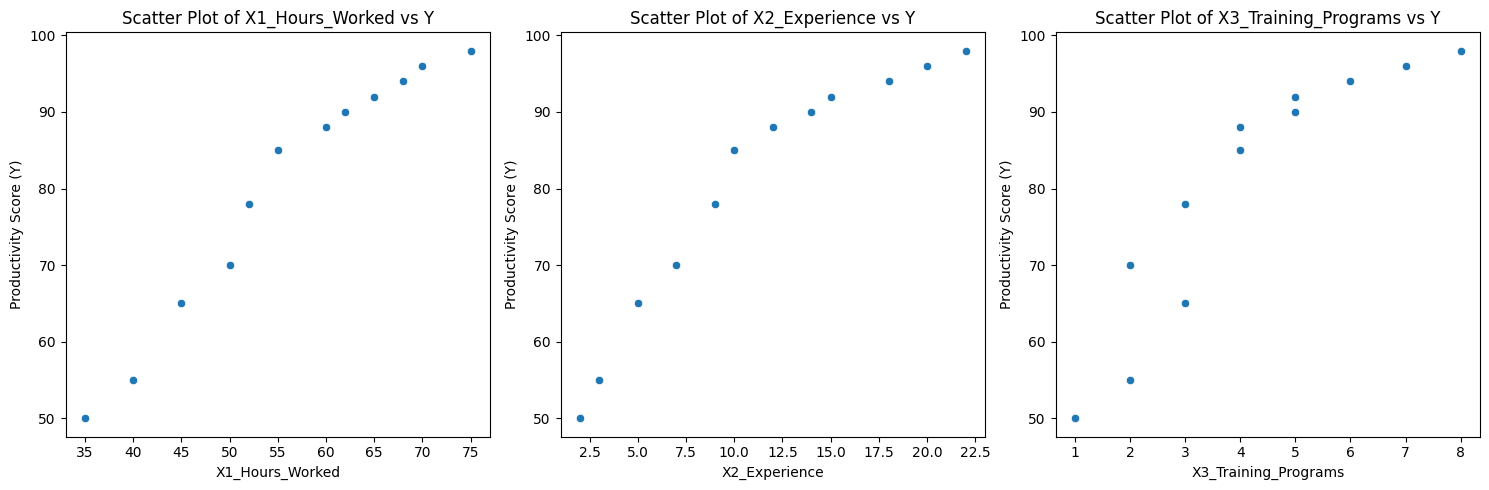

In [16]:
plt.figure(figsize=(15,5))
for i, col in enumerate(["X1_Hours_Worked", "X2_Experience", "X3_Training_Programs"], 1):
    plt.subplot(1,3,i)
    sns.scatterplot(x=df[col], y=df["Y_Productivity_Score"])
    plt.xlabel(col)
    plt.ylabel("Productivity Score (Y)")
    plt.title(f"Scatter Plot of {col} vs Y")
plt.tight_layout()
plt.show()

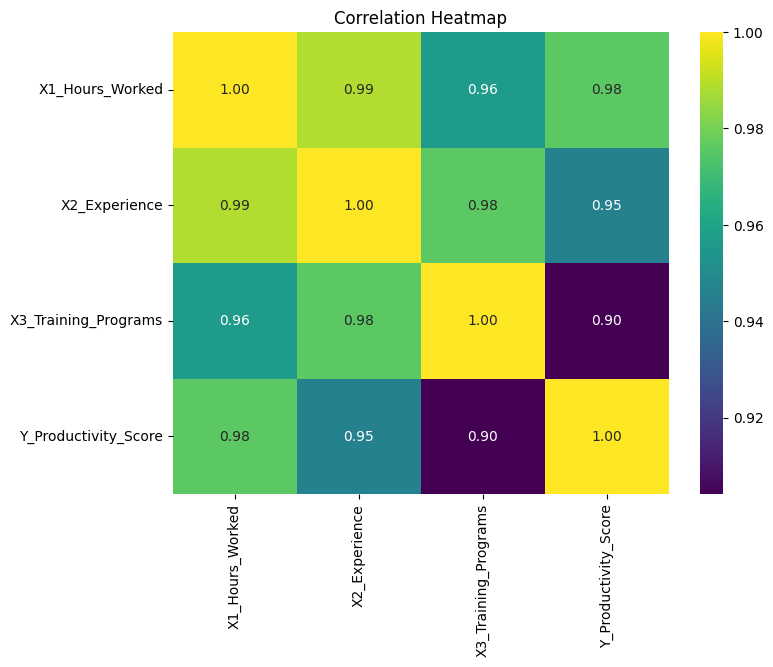

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()